In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 15.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 32.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="ntp7VqO5aAW6Ze0uGW0U")
project = rf.workspace("birds-dglcq").project("bird-classification-hp8xp")
version = project.version(2)
dataset = version.download("yolov8")  # This downloads and unzips into /content/<dataset_name>


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bird-classification-2 in yolov8:: 100%|██████████| 1750/1750 [00:00<00:00, 7717.62it/s]


In [4]:
# Replace with the actual path to your data.yaml
data_yaml_path = "/kaggle/working/bird-classification-2/data.yaml"

# Load the pretrained YOLOv8 model (you can choose yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8s.pt")

# Train the model
model.train(data=data_yaml_path, epochs=25, imgsz=640, batch=8)

100%|██████████| 21.5M/21.5M [00:00<00:00, 163MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/bird-classification-2/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 16.6MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 68.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1071.3±227.9 MB/s, size: 43.4 KB)


train: Scanning /kaggle/working/bird-classification-2/train/labels... 656 images, 0 backgrounds, 0 corrupt: 100%|██████████| 656/656 [00:00<00:00, 1372.88it/s]

train: New cache created: /kaggle/working/bird-classification-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 314.9±124.8 MB/s, size: 38.6 KB)


val: Scanning /kaggle/working/bird-classification-2/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 1504.27it/s]

val: New cache created: /kaggle/working/bird-classification-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      1.93G      1.322      2.919      1.646         21        640: 100%|██████████| 82/82 [00:13<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

                   all        110        110      0.674      0.318      0.246      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.31G      1.335      1.899      1.632         14        640: 100%|██████████| 82/82 [00:11<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.56it/s]

                   all        110        110      0.886      0.273      0.375      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.33G       1.42      1.791      1.655         14        640: 100%|██████████| 82/82 [00:11<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.42it/s]

                   all        110        110      0.728      0.273      0.281      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.33G       1.38       1.67      1.632         26        640: 100%|██████████| 82/82 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.22it/s]

                   all        110        110      0.829      0.439      0.459      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.33G      1.377       1.67      1.626         22        640: 100%|██████████| 82/82 [00:11<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.70it/s]

                   all        110        110      0.879      0.227      0.365      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.33G      1.355      1.521      1.601         16        640: 100%|██████████| 82/82 [00:11<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.04it/s]

                   all        110        110      0.405      0.182      0.285      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.33G      1.304      1.397      1.562         15        640: 100%|██████████| 82/82 [00:11<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]

                   all        110        110      0.346      0.455      0.427      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.33G      1.246      1.462      1.539         19        640: 100%|██████████| 82/82 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]

                   all        110        110      0.935      0.409      0.637      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.33G      1.275      1.378      1.563         15        640: 100%|██████████| 82/82 [00:11<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]

                   all        110        110      0.307      0.409      0.333       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.33G      1.248      1.367      1.536         20        640: 100%|██████████| 82/82 [00:11<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]

                   all        110        110      0.448      0.396      0.423      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.33G      1.205      1.247      1.482         16        640: 100%|██████████| 82/82 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]

                   all        110        110        0.5       0.35      0.431      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.33G      1.176      1.158      1.464         14        640: 100%|██████████| 82/82 [00:11<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]

                   all        110        110      0.211      0.455      0.293      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.33G      1.127      1.129      1.435         17        640: 100%|██████████| 82/82 [00:12<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.05it/s]

                   all        110        110       0.39      0.409      0.414      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.33G      1.139      1.141      1.439         21        640: 100%|██████████| 82/82 [00:12<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        110        110      0.335      0.318      0.359      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.33G      1.108      1.073      1.419         17        640: 100%|██████████| 82/82 [00:12<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        110        110      0.357      0.455      0.392      0.244


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.33G     0.9392     0.8134      1.397          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.03it/s]

                   all        110        110      0.391      0.364      0.398      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.33G     0.9273     0.7631      1.376          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.20it/s]

                   all        110        110      0.458      0.495      0.486      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.33G     0.8796     0.6436      1.352          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        110        110      0.224      0.409      0.303      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.33G     0.8268     0.6015      1.316          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.99it/s]

                   all        110        110      0.408      0.455      0.405      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.33G     0.8028     0.5824      1.286         10        640: 100%|██████████| 82/82 [00:12<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.14it/s]

                   all        110        110      0.254      0.409      0.286       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.33G     0.7832     0.5706      1.252          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        110        110      0.384      0.455      0.401      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.33G      0.756     0.5248       1.23          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.12it/s]

                   all        110        110      0.366      0.455      0.381      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.33G     0.7091     0.5082      1.193          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]

                   all        110        110       0.33      0.455      0.395      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.33G      0.699     0.4713        1.2          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.96it/s]

                   all        110        110      0.371      0.455      0.401      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.33G     0.6826     0.4457      1.159          8        640: 100%|██████████| 82/82 [00:12<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.00it/s]

                   all        110        110      0.348      0.455      0.402      0.313



25 epochs completed in 0.094 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


                   all        110        110      0.935      0.409      0.637      0.342
           Arctic tern         99         99          1          0      0.505      0.303
Asian brown flycatcher         11         11      0.869      0.818      0.769      0.381


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8b6e3dbd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Load the trained model
model = YOLO("/kaggle/working/yolov8s.pt")  # Or replace with the actual path

# Run inference on an image (or use a loop over test images)
results = model("/kaggle/working/bird-classification-2/valid/images/182_jpg.rf.e79f28d3d26548a14b327d583911e389.jpg")  # Can also be a single image

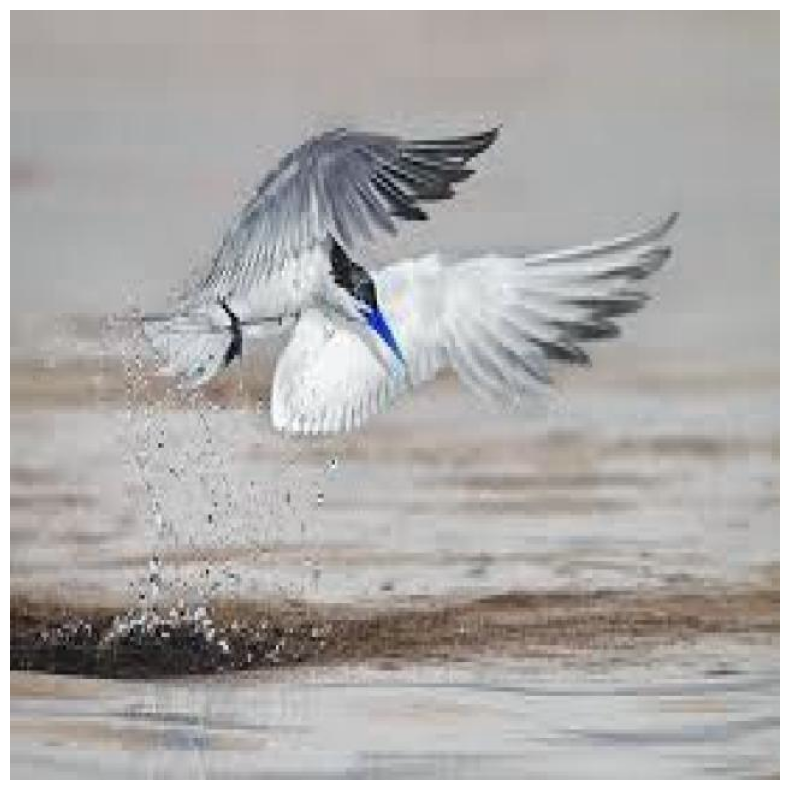

In [15]:
# Display predictions with bounding boxes and labels
for r in results:
    # Save or display the image with annotations
    annotated_img = r.plot()  # This returns an image with boxes and labels drawn

    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()